## Discovering Abstract Topics in Yelp Reviews - Technical Report

### 1. Background

Yelp is an American multinational corporation headquartered in San Francisco, California. It develops, hosts and markets Yelp.com and the Yelp mobile app, which publish crowd-sourced reviews about local businesses, as well as the online reservation service Yelp Reservations and online food-delivery service Eat24. The company also trains small businesses in how to respond to reviews, hosts social events for reviewers, and provides data about businesses, including health inspection scores.

Yelp.com is a crowd-sourced local business review and social networking site. Its user community is primarily active in major metropolitan areas.The site has pages devoted to individual locations, such as restaurants or schools, where Yelp users can submit a review on their products or services using a one to five star rating system.Businesses can also update contact information, hours and other basic listing information or add special deals. In addition to writing reviews, users can react to reviews, plan events or discuss their personal lives. According to Sterling Market Intelligence, Yelp is "one of the most important sites on the Internet." As of Q2 2016 it has 168 million monthly unique visitors and 108 million reviews.

78 percent of businesses listed on the site have a rating of three stars or better, but some negative reviews are very personal or extreme. Many reviews are written in an entertaining or creative manner. Users can give a review a "thumbs-up" if it is "useful, funny or cool." Each day a "Review of the Day" is determined based on a vote by users.


### 2. Problem Statement

The objective of this project is to unearth the "topics" being talked about in Yelp Reviews, understand their distribution and develop an understanding of Yelp Reviews that will serve as a foundation to tackle more sophisticated questions in the future, such as:

-   Cultural Trends: What makes a particular city different? What cuisines do Yelpers rave about in different countries? Do Americans tend to eat out late compared to those in Germany or the U.K.? In which countries are Yelpers sticklers for service quality? In international cities such as Montreal, are French speakers reviewing places differently than English speakers?

-   Inferring Categories: Are there any non-intuitive correlations between business categories e.g., how many karaoke bars also offer Korean food, and vice versa? What businesses deserve their own subcategory (i.e., Szechuan or Hunan versus just "Chinese restaurants")

-   Detecting Sarcasm in Reviews: Are Yelpers a sarcastic bunch?

-   Detecting Changepoints and Events: Detecting when things change suddenly (e.g., a business coming under new management or when a city starts going nuts over cronuts)

### 3. Data Collection and Cleaning

In [ ]:
### Link to requirements.txt on github

### 3.1 Data Dictionary

The data for the project was obtained from https://www.yelp.com/dataset_challenge/dataset. 

- 400K reviews and 100K tips by 120K users for 106K businesses
- Cities(US): Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland
<br><br>
1. Businesses table:
<br><br>
    - "business_id":"encrypted business id"
    - "name":"business name"
    - "neighborhood":"hood name"
    - "address":"full address"
    - "city":"city"
    - "state":"state -- if applicable --"
    - "postal code":"postal code"
    - "latitude":latitude
    - "longitude":longitude
    - "stars":star rating, rounded to half-stars
    - "review_count":number of reviews
    - "is_open":0/1 (closed/open)
    - "attributes":["an array of strings: each array element is an attribute"]
    - "categories":["an array of strings of business categories"]
    - "hours":["an array of strings of business hours"]
    - "type": "business"
<br><br>
2. Reviews table:
<br><br>
    - "review_id":"encrypted review id"
    - "user_id":"encrypted user id"
    - "business_id":"encrypted business id"
    - "stars":star rating, rounded to half-stars
    - "date":"date formatted like 2009-12-19"
    - "text":"review text"
    - "useful":number of useful votes received
    - "funny":number of funny votes received
    - "cool": number of cool review votes received
    - "type": "review"
<br><br>
3. Users table:
<br><br>
    - "user_id":"encrypted user id"
    - "name":"first name"
    - "review_count":number of reviews
    - "yelping_since": date formatted like "2009-12-19"
    - "friends":["an array of encrypted ids of friends"]
    - "useful":"number of useful votes sent by the user"
    - "funny":"number of funny votes sent by the user"
    - "cool":"number of cool votes sent by the user"
    - "fans":"number of fans the user has"
    - "elite":["an array of years the user was elite"]
    - "average_stars":floating point average like 4.31
    - "compliment_hot":number of hot compliments received by the user
    - "compliment_more":number of more compliments received by the user
    - "compliment_profile": number of profile compliments received by the user
    - "compliment_cute": number of cute compliments received by the user
    - "compliment_list": number of list compliments received by the user
    - "compliment_note": number of note compliments received by the user
    - "compliment_plain": number of plain compliments received by the user
    - "compliment_cool": number of cool compliments received by the user
    - "compliment_funny": number of funny compliments received by the user
    - "compliment_writer": number of writer compliments received by the user
    - "compliment_photos": number of photo compliments received by the user
    - "type":"user"
<br><br>
4. Checkins table:
<br><br>
    - "time":["an array of check ins with the format day-hour:number of check ins from hour to hour+1"]
    - "business_id":"encrypted business id"
    - "type":"checkin"
<br><br>
5. Tips table:
<br><br>
    - "text":"text of the tip"
    - "date":"date formatted like 2009-12-19"
    - "likes":compliment count
    - "business_id":"encrypted business id"
    - "user_id":"encrypted user id"
    - "type":"tip"

### 3.2 Data Cleaning

#### 3.2.1 Converted raw json files obtained from https://www.yelp.com/dataset_challenge/dataset into csv files.

<pre>
```python
def convert_json_to_csv(json_file_dir, csv_file_dir):
    
    for filename in os.listdir(json_file_dir):
        if filename.endswith('.json'):
            try:
                pd.read_json(os.path.join(json_file_dir, filename), lines=True).to_csv(os.path.join(csv_file_path, filename.replace('.json', '.csv')), encoding='utf-8', index=False)
            except:
                print filename + 'error\n'
                
convert_json_to_csv('/home/amlanlimaye/yelp-dataset-challenge/data/raw/', 
                    '/home/amlanlimaye/yelp-dataset-challenge/data/interim/original_csv/')
```
<pre>

#### 3.2.2 Reading all data tables

<pre>
```python
table_names = ['business', 'review', 'user', 'checkin', 'tip']
original_csv_filepath = '/home/amlanlimaye/yelp-dataset-challenge/data/interim/original_csv/'
    
for tbl_name in table_names:
    globals()[tbl_name] = pd.read_csv(original_csv_filepath + "{}".format(tbl_name) + '.csv')
```
<pre>

#### 3.2.3 Cleaning 'business' table

<pre>
```python

# Sample row in the attributes column:

# u"[BikeParking: True, BusinessAcceptsBitcoin: False, BusinessAcceptsCreditCards: True, BusinessParking: {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}, DogsAllowed: False, RestaurantsPriceRange2: 2, WheelchairAccessible: True]"

# Function to clean the attributes column and use regex to make python understand that business['attributes'] is a json-type dict:

def clean_business(test_str):
    
    test_str = test_str.fillna('[]')
    test_str = test_str.map(lambda x: x.replace('[','{'))
    test_str = test_str.map(lambda x: x.replace(']','}'))
    test_str = test_str.map(lambda x: x.replace('True', 'true'))
    test_str = test_str.map(lambda x: x.replace('False', 'false'))
    test_str = test_str.map(lambda x: x.replace('\'', '"'))
    
    matches = re.findall("([A-Za-z0-9]+)(?=:)", test_str)

    if len(matches):
        for match in matches:
            test_str = test_str.replace(match, '"%s"' % match)
            
    return test_str
    
business['attributes'] = business['attributes'].map(regex_match)

# Function to extract attributes from json object and convert them into columns

def expand_features(row):
    try:
        extracted = json.loads(row['attributes'])
        for key, value in extracted.items():
            print key, type(value)
            if type(value) != dict:
                row["attribute_" + key] = value
            else:
                for attr_key, attr_value in value.items():
                    row["attribute_" + key + "_" + attr_key] = attr_value
    except:
        print "could not decode:", row['attributes']
    
    return row
    
business.apply(expand_features, axis=1).columns

# Cleaning 'categories' column

business['categories'] = business['categories'].fillna(' ')
business['categories'] = business['categories'].map(lambda x: x[1:-1].split(','))

# Cleaning 'hours' column

business['hours'] = business['hours'].fillna(' ')
business['hours'] = business['hours'].map(lambda x: x[1:-1].split(','))

# Cleaning 'neighborhoods' column

business['neighborhood'] = business['neighborhood'].fillna(' ')
business['neighborhood'] = business['neighborhood'].map(lambda x: x[1:-1].split(','))

# Cleaning 'postal_code' column

business['postal_code'] = business['postal_code'].map(lambda x: x[:-2])

```
<pre>

In [27]:
business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,type
0,"227 E Baseline Rd, Ste J2","{""BikeParking"": true, ""BusinessAcceptsBitcoin""...",0DI8Dt2PJp07XkVvIElIcQ,"[Tobacco Shops, Nightlife, Vape Shops, Shop...",Tempe,"[Monday 11:0-21:0, Tuesday 11:0-21:0, Wednes...",0,33.378214,-111.936102,Innovative Vapors,[],85283.0,17,4.5,AZ,business
1,495 S Grand Central Pkwy,"{""BusinessAcceptsBitcoin"": false, ""BusinessAcc...",LTlCaCGZE14GuaUXUGbamg,"[Caterers, Grocery, Food, Event Planning & ...",Las Vegas,"[Monday 0:0-0:0, Tuesday 0:0-0:0, Wednesday ...",1,36.192284,-115.159272,Cut and Taste,[],89106.0,9,5.0,NV,business


#### 3.2.4 Cleaning 'review' table

<pre>
```python
# Cleaning the 'date' column

review['date'] = pd.to_datetime(review['date'])

# Cleaning the 'useful' column

review['useful'] = review['useful'].fillna(0)
review['useful'] = review['useful'].map(int)

```
<pre>

In [40]:
review.head(2)

,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id
0,2hkQ5S6L_D7yX3pWtPw2Ww,0,2016-05-23,0,ppVujROE-SfvlV4mqbokJQ,5.0,"Honestly, if your looking for someone to do yo...",review,0,tOplTv2njld2dzMe7qdTvw
1,2hkQ5S6L_D7yX3pWtPw2Ww,0,2016-03-30,0,lOI1deu5emPtr5JnlaFx_g,5.0,Ive had a bad experience with lashes b4 and wa...,review,0,ww4tDDd-k2RgsR2Aun9LNQ


In [30]:
review.text.head(2)

0    Honestly, if your looking for someone to do yo...
1    Ive had a bad experience with lashes b4 and wa...
Name: text, dtype: object

/home/amlanlimaye/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


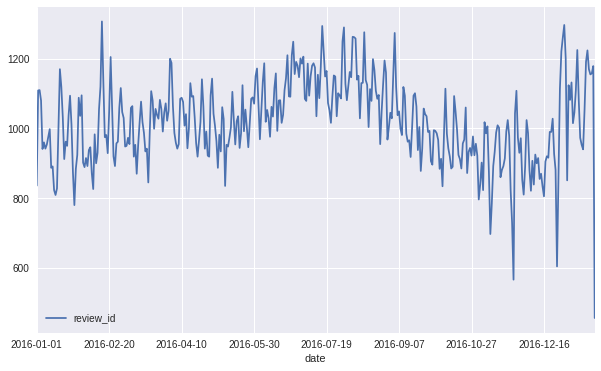

In [18]:
review_all = pd.read_csv('../../data/interim/original_csv/review.csv')

# Number of reviews by date
# The sharp seasonal falls are Chrismas Day and New Year's Day
# The sharp seasonal spikes are in summer, where people presumably have more free time

review.groupby('date').agg({'review_id': len}).reset_index().plot(x='date', y='review_id', figsize=(10,6))

#### 3.2.5 Cleaning 'checkin' table

<pre>
```python

# Cleaning 'time' column

checkin['time'] = checkin['time'].map(lambda x: x[1:-1].split(','))

# Making columns aggregating checkins by day of week

checkin['mon_list'] = checkins['time'].map(lambda x: [list_item for list_item in x[1:-1].split(',') if 'Mon' in list_item])
checkin['tue_list'] = checkins['time'].map(lambda x: [list_item for list_item in x[1:-1].split(',') if 'Tue' in list_item])
checkin['wed_list'] = checkins['time'].map(lambda x: [list_item for list_item in x[1:-1].split(',') if 'Wed' in list_item])
checkin['thu_list'] = checkins['time'].map(lambda x: [list_item for list_item in x[1:-1].split(',') if 'Thu' in list_item])
checkin['fri_list'] = checkins['time'].map(lambda x: [list_item for list_item in x[1:-1].split(',') if 'Fri' in list_item])
checkin['sat_list'] = checkins['time'].map(lambda x: [list_item for list_item in x[1:-1].split(',') if 'Sat' in list_item])
checkin['sun_list'] = checkins['time'].map(lambda x: [list_item for list_item in x[1:-1].split(',') if 'Sun' in list_item])

# Converting day of week lists to dictionaries so that # of checkins can be looked up by hour

checkin['mon_list'] = checkin['mon_list'].map(lambda x: 
                                              {int(list_item.replace(' ', '').replace('Mon-', '').split(':')[0]):int(list_item.replace(' ', '').replace('Mon-', '').split(':')[1]) 
                                               for list_item in x})

checkin['tue_list'] = checkin['tue_list'].map(lambda x: 
                                              {int(list_item.replace(' ', '').replace('Tue-', '').split(':')[0]):int(list_item.replace(' ', '').replace('Tue-', '').split(':')[1]) 
                                               for list_item in x})

checkin['wed_list'] = checkin['wed_list'].map(lambda x: 
                                              {int(list_item.replace(' ', '').replace('Wed-', '').split(':')[0]):int(list_item.replace(' ', '').replace('Wed-', '').split(':')[1]) 
                                               for list_item in x})

checkin['thu_list'] = checkin['thu_list'].map(lambda x: 
                                              {int(list_item.replace(' ', '').replace('Thu-', '').split(':')[0]):int(list_item.replace(' ', '').replace('Thu-', '').split(':')[1]) 
                                               for list_item in x})

checkin['fri_list'] = checkin['fri_list'].map(lambda x: 
                                              {int(list_item.replace(' ', '').replace('Fri-', '').split(':')[0]):int(list_item.replace(' ', '').replace('Fri-', '').split(':')[1]) 
                                               for list_item in x})

checkin['sat_list'] = checkin['sat_list'].map(lambda x: 
                                              {int(list_item.replace(' ', '').replace('Sat-', '').split(':')[0]):int(list_item.replace(' ', '').replace('Sat-', '').split(':')[1]) 
                                               for list_item in x})

checkin['sun_list'] = checkin['sun_list'].map(lambda x: 
                                              {int(list_item.replace(' ', '').replace('Sun-', '').split(':')[0]):int(list_item.replace(' ', '').replace('Sun-', '').split(':')[1]) 
                                               for list_item in x})

```
<pre>

In [34]:
checkin.head(2)

,business_id,time,type,mon_list,tue_list,wed_list,thu_list,fri_list,sat_list,sun_list
0,7KPBkxAOEtb3QeIL9PEErg,"[Fri-0:2, Sat-0:1, Sun-0:1, Wed-0:2, Sat-1...",checkin,"{11: 1, 12: 1, 18: 1, 19: 1, 20: 1, 23: 1}","{4: 1, 12: 1, 13: 2, 15: 1, 16: 1, 18: 2, 20: ...","{0: 2, 1: 1, 2: 1, 6: 1, 11: 2, 13: 2, 14: 1, ...","{1: 1, 2: 1, 4: 1, 13: 1, 15: 1, 19: 1, 20: 1,...","{0: 2, 3: 1, 10: 1, 14: 2, 15: 1, 16: 1, 18: 1...","{0: 1, 1: 2, 2: 1, 10: 1, 12: 1, 13: 2, 14: 1,...","{0: 1, 2: 2, 3: 3, 6: 1, 16: 1, 17: 1, 18: 1, ..."
1,kREVIrSBbtqBhIYkTccQUg,"[Mon-13:1, Thu-13:1, Sat-16:1, Wed-17:1, S...",checkin,{13: 1},{},{17: 1},"{20: 1, 13: 1}",{},"{16: 1, 21: 1}",{19: 1}


#### 3.2.6 Cleaning 'user' table

<pre>
```
# Cleaning 'elite' column

user['elite'] = user['elite'].map(lambda x: x[1:-1].split(','))

# Cleaning 'friends' column

user['friends'] = user['friends'].map(lambda x: x[1:-1].split(','))

# Cleaning 'yelping since' column

user['yelping_since'] = pd.to_datetime(user['yelping_since'])

```
<pre>

In [36]:
user.head(2)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,elite,fans,friends,funny,name,review_count,type,useful,user_id,yelping_since
0,3.59,4192,79,4192,3904,19,305,4705,1347,2617,...,"[2017, 2015, 2016, 2014, 2011, 2013, 2012]",298,"[iJg9ekPzF9lkMuvjKYX6uA, ctWAuzS04Xu0lke2Rop4...",12316,Rob,761,user,18456,EZmocAborM6z66rTzeZxzQ,2009-09-12
1,4.29,144,11,144,64,1,4,97,24,129,...,[None],34,"[r2UUCzGxqI6WPsiWPgqG2A, qewG3X2O4X6JKskxyyqF...",28,Vivian,80,user,117,myql3o3x22_ygECb8gVo7A,2009-06-27


#### 3.2.7 Cleaning 'tip' table

<pre>
```python
# Cleaning 'date' column

tip['date'] = pd.to_datetime(tip['date'])
```
<pre>

In [37]:
tip.head(2)

,business_id,date,likes,text,type,user_id
0,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,tip,oaYhjqBbh18ZhU0bpyzSuw
1,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,tip,ulQ8Nyj7jCUR8M83SUMoRQ


In [38]:
tip.text.head(2)

0    Nice place. Great staff.  A fixture in the tow...
1                       Happy hour 5-7 Monday - Friday
Name: text, dtype: object

### 4. Model - Latent Dirichlet Allocation (LDA)

A topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is.

LDA (Latent Dirichlet Allocation) is an example of a topic model that posits that each document is a mixture of a small number of topics and that each word's creation is attributable to one of the document's topics. 

LDA represents documents as mixtures of topics that spit out words with certain probabilities. It assumes that documents are produced in the following fashion: when writing each document, you:

Decide on the number of words N the document will have (say, according to a Poisson distribution).
Choose a topic mixture for the document (according to a Dirichlet distribution over a fixed set of K topics). For example, assuming that we have the two topics; food and cute animals, you might choose the document to consist of 1/3 food and 2/3 cute animals.
Generate each word in the document by:
....First picking a topic (according to the multinomial distribution that you sampled above; for example, you might pick the food topic with 1/3 probability and the cute animals topic with 2/3 probability).
....Then using the topic to generate the word itself (according to the topic's multinomial distribution). For instance, the food topic might output the word "broccoli" with 30% probability, "bananas" with 15% probability, and so on.

Assuming this generative model for a collection of documents, LDA then tries to backtrack from the documents to find a set of topics that are likely to have generated the collection.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns # For prettier plots. Seaborn takes over pandas' default plotter
import nltk
import pyLDAvis
import pyLDAvis.sklearn

from gensim import models, matutils
from collections import defaultdict
from gensim import corpora
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

pyLDAvis.enable_notebook()
%matplotlib inline

/home/amlanlimaye/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
review = pd.read_csv('../../data/interim/clean_US_cities/2016_review.csv')
review = review.fillna('')

tvec = TfidfVectorizer(stop_words='english', min_df=10, max_df=0.5, max_features=100,
                       norm='l2', 
                       strip_accents='unicode'
                       )
review_dtm_tfidf = tvec.fit_transform(review['text'])

cvec = CountVectorizer(stop_words='english', min_df=10, max_df=0.5, max_features=100,
                       strip_accents='unicode')
review_dtm_cvec = cvec.fit_transform(review['text'])

print review_dtm_tfidf.shape, review_dtm_cvec.shape

(393275, 100) (393275, 100)


In [12]:
# Fitting LDA models

# On cvec DTM
lda_cvec = LatentDirichletAllocation(n_topics=10, random_state=42)
lda_cvec.fit(review_dtm_cvec)

# On tfidf DTM
lda_tfidf = LatentDirichletAllocation(n_topics=10, random_state=42)
lda_tfidf.fit(review_dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_jobs=1, n_topics=10, perp_tol=0.1, random_state=42,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [15]:
lda_viz_10_topics_cvec = pyLDAvis.sklearn.prepare(lda_cvec, review_dtm_cvec, cvec)
lda_viz_10_topics_cvec

# topic labels

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
9      16.909108        1       1  0.138017  0.052378
4      14.128544        1       2  0.042466 -0.024027
8      12.923313        1       3 -0.163793  0.074071
0      11.982070        1       4  0.131450  0.102761
6      11.681748        1       5  0.051307 -0.106311
1       8.546442        1       6  0.164774  0.102864
3       7.549767        1       7  0.107966 -0.069904
2       6.237702        1       8 -0.017843  0.210098
7       5.194281        1       9 -0.020278 -0.377497
5       4.847026        1      10 -0.434066  0.035566, topic_info=     Category           Freq        Term          Total  loglift  logprob
term                                                                     
30    Default  172938.000000        food  172938.000000  30.0000  30.0000
36    Default  164568.000000       great  164568.000000  29.0000  29.0000
7     Default   74346.000000        best   74346.000000  28.0000  28.0000
1     Default   63815.000000     amazing   63815.000000  27.0000  27.0000
58    Default   59357.000000       order   59357.000000  26.0000  26.0000
34    Default  162661.000000        good  162661.000000  25.0000  25.0000
68    Default   50801.000000  restaurant   50801.000000  24.0000  24.0000
59    Default   57623.000000     ordered   57623.000000  23.0000  23.0000
91    Default   83084.000000       vegas   83084.000000  22.0000  22.0000
50    Default   59179.000000        love   59179.000000  21.0000  21.0000
62    Default  170827.000000       place  170827.000000  20.0000  20.0000
13    Default   46724.000000     chicken   46724.000000  19.0000  19.0000
66    Default   85697.000000      really   85697.000000  18.0000  18.0000
20    Default   45680.000000   delicious   45680.000000  17.0000  17.0000
70    Default   47830.000000        room   47830.000000  16.0000  16.0000
90    Default   69552.000000          ve   69552.000000  15.0000  15.0000
24    Default   66417.000000         don   66417.000000  14.0000  14.0000
81    Default   39611.000000        sure   39611.000000  13.0000  13.0000
43    Default  121267.000000        like  121267.000000  12.0000  12.0000
77    Default   59185.000000       staff   59185.000000  11.0000  11.0000
35    Default   78358.000000         got   78358.000000  10.0000  10.0000
51    Default   46682.000000        make   46682.000000   9.0000   9.0000
19    Default   58620.000000  definitely   58620.000000   8.0000   8.0000
61    Default   29019.000000       pizza   29019.000000   7.0000   7.0000
32    Default   54130.000000    friendly   54130.000000   6.0000   6.0000
75    Default  147926.000000     service  147926.000000   5.0000   5.0000
71    Default   46245.000000        said   46245.000000   4.0000   4.0000
46    Default   32456.000000    location   32456.000000   3.0000   3.0000
92    Default   42403.000000        wait   42403.000000   2.0000   2.0000
27    Default   27587.000000   excellent   27587.000000   1.0000   1.0000
...       ...            ...         ...            ...      ...      ...
96    Topic10    1231.177296         way   41159.810085  -0.4827  -5.2674
23    Topic10     371.605193   different   24191.447734  -1.1491  -6.4653
84    Topic10     721.275434        time  138054.324949  -2.2276  -5.8021
15    Topic10      37.665693        come   59766.134626  -4.3426  -8.7543
38    Topic10      11.792113        home   24672.913375  -4.6192  -9.9157
40    Topic10      36.443566        just  127671.291774  -5.1346  -8.7873
37    Topic10       0.254656       happy   27995.011383  -8.5808 -13.7509
74    Topic10       0.118226      server   25535.014709  -9.2562 -14.5182
65    Topic10       0.107357     quality   23536.551384  -9.2711 -14.6147
2     Topic10       0.107351        area   24423.709298  -9.3082 -14.6147
78    Topic10       0.107354       stars   24881.254305  -9.3267 -14.6147
48    Topic10       0.107360     looking   25205.9338

In [ ]:
topics_labels = {
   1: "customer_feelings",
   2: "customer_actions",
   3: "restaurant_related",
    4: "compliments",
    5: "las_vegas_related",
    6: "hotel_related",
    7: "location_related",
    8: "chicken_related",
    9: "superlatives",
    10: "ordering_pizza"
}

### Generating topic probabilities for each review

In [8]:
vocab = {v: k for k, v in cvec.vocabulary_.iteritems()}
vocab

{0: u'10',
 1: u'amazing',
 2: u'area',
 3: u'asked',
 4: u'awesome',
 5: u'bad',
 6: u'bar',
 7: u'best',
 8: u'better',
 9: u'called',
 10: u'came',
 11: u'car',
 12: u'check',
 13: u'chicken',
 14: u'clean',
 15: u'come',
 16: u'coming',
 17: u'customer',
 18: u'day',
 19: u'definitely',
 20: u'delicious',
 21: u'did',
 22: u'didn',
 23: u'different',
 24: u'don',
 25: u'drinks',
 26: u'eat',
 27: u'excellent',
 28: u'experience',
 29: u'feel',
 30: u'food',
 31: u'fresh',
 32: u'friendly',
 33: u'going',
 34: u'good',
 35: u'got',
 36: u'great',
 37: u'happy',
 38: u'home',
 39: u'hotel',
 40: u'just',
 41: u'know',
 42: u'las',
 43: u'like',
 44: u'little',
 45: u'll',
 46: u'location',
 47: u'long',
 48: u'looking',
 49: u'lot',
 50: u'love',
 51: u'make',
 52: u'menu',
 53: u'minutes',
 54: u'need',
 55: u'new',
 56: u'nice',
 57: u'night',
 58: u'order',
 59: u'ordered',
 60: u'people',
 61: u'pizza',
 62: u'place',
 63: u'pretty',
 64: u'price',
 65: u'quality',
 66: u'really'

In [9]:
lda_ = models.LdaModel(
    matutils.Sparse2Corpus(review_dtm_cvec, documents_columns=False),
    # or use the corpus object created with the dictionary in the previous frame!
    # corpus, 
    num_topics  =  10,
    passes      =  1,
    id2word     =  vocab
    # or use the gensim dictionary object!
    # id2word     =  dictionary
)

In [ ]:
stops = stopwords.words()

docs = pd.DataFrame(review_dtm_cvec.toarray(), columns=vectorizer.get_feature_names())
docs.sum()

bow = []

for document in review_dtm_cvec.toarray():
    
    single_document = []
    
    for token_id, token_count in enumerate(document):

        if token_count > 0:
            single_document.append((token_id, token_count))

    bow.append(single_document)

# remove words that appear only once
frequency = defaultdict(int)

for text in documents:
    for token in text.split():
        frequency[token] += 1

texts = [[token for token in text.split() if frequency[token] > 1 and token not in stops]
          for text in documents]

# Create gensim dictionary object
dictionary = corpora.Dictionary(texts)

# Create corpus matrix
corpus = [dictionary.doc2bow(text) for text in texts]

lda_.print_topics(num_topics=3, num_words=5)

lda_.get_document_topics(bow[0])

In [ ]:
doc_topics = [lda_.get_document_topics(doc) for doc in corpus]

topic_data = []

for document_id, topics in enumerate(doc_topics):
    
    document_topics = []
    
    for topic, probability in topics:
       
        topic_data.append({
            'document_id':  document_id,
            'topic_id':     topic,
            'topic':        topics_labels[topic],
            'probability':  probability
        })

topics_df = pd.DataFrame(topic_data.[:5])
topics_df.pivot_table(values="probability", index=["document_id", "topic"]).T

### Conclusions and Next Steps

The next step is to generate a matrix of topic probabilities for each review, which I did actually work on but the first time I tried it, it crashed and the 2nd time it wasn't even done after 5 hours, so that definitely needs more work. The huge size of the data, 400K reviews is definitely a challenge, but I'm optimistic on being able to do that soon.

I was able to discover reasonably distinct abstract topics in Yelp Reviews, understand their distribution and develop an understanding of Yelp Reviews that will serve as a foundation to tackle more sophisticated and ambitious questions in the future, such as:

-   Cultural Trends: What makes a particular city different? What cuisines do Yelpers rave about in different countries? Do Americans tend to eat out late compared to those in Germany or the U.K.? In which countries are Yelpers sticklers for service quality? In international cities such as Montreal, are French speakers reviewing places differently than English speakers?

-   Inferring Categories: Are there any non-intuitive correlations between business categories e.g., how many karaoke bars also offer Korean food, and vice versa? What businesses deserve their own subcategory (i.e., Szechuan or Hunan versus just "Chinese restaurants")

-   Detecting Sarcasm in Reviews: Are Yelpers a sarcastic bunch?

-   Detecting Changepoints and Events: Detecting when things change suddenly (e.g., a business coming under new management or when a city starts going nuts over cronuts)

### References

Chen, E. (2011, August 28). What is a good explanation of Latent Dirichlet Allocation? Retrieved February 8, 2017, from https://www.quora.com/What-is-a-good-explanation-of-Latent-Dirichlet-Allocation/answer/Edwin-Chen-1

W. (2017, January 07). Topic Modeling. Retrieved February 08, 2017, from https://en.wikipedia.org/wiki/Topic_model

W. (2017, January 20). Latent Dirichlet Allocation. Retrieved February 08, 2017, from https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

W. (2004, October 20). Yelp. Retrieved February 08, 2017, from https://en.wikipedia.org/wiki/Yelp

Y. (2017, January 24). Yelp Dataset Challenge. Retrieved February 08, 2017, from https://www.yelp.com/dataset_challenge